## scikit-learn中的 SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2, :2]
y = y[y<2]

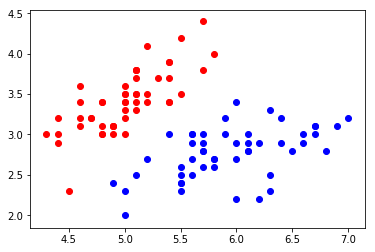

In [3]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [6]:
def plot_decision_boundry(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

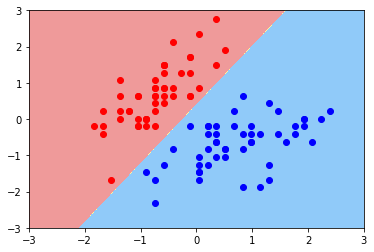

In [7]:
plot_decision_boundry(svc, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [8]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

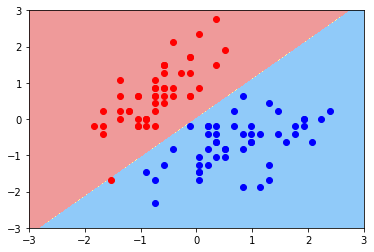

In [9]:
plot_decision_boundry(svc2, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [10]:
svc.coef_

array([[ 4.03240105, -2.49296237]])

In [11]:
svc.intercept_

array([0.95365373])

In [12]:
def plot_svc_decision_boundry(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    # w0 * x0 + w1 * x1 + b = 0
    # x1 = - w0 * x0 / w1 - b / w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1]*plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1]*plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.scatter(plot_x[up_index], up_y[up_index], color='black')
    plt.scatter(plot_x[down_index], down_y[down_index], color='black')

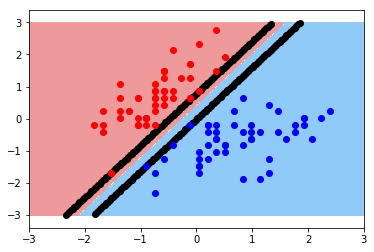

In [13]:
plot_svc_decision_boundry(svc, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

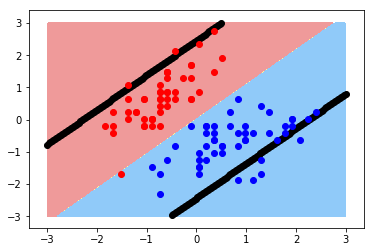

In [14]:
plot_svc_decision_boundry(svc2, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [15]:
svc3 = LinearSVC(C=0.1)
svc3.fit(X_standard, y)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

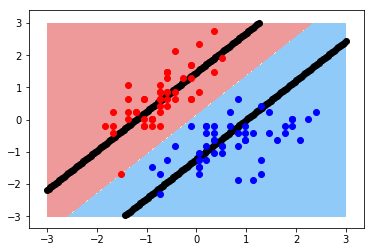

In [16]:
plot_svc_decision_boundry(svc3, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [19]:
svc4 = LinearSVC(C=0.1, penalty='l1', dual=False)
svc4.fit(X_standard, y)

LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

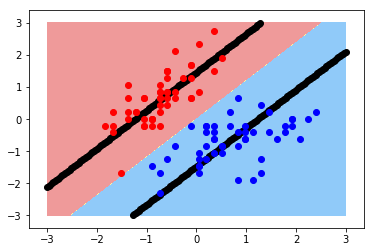

In [20]:
plot_svc_decision_boundry(svc4, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()

In [21]:
svc5 = LinearSVC(penalty='l1', dual=False)
svc5.fit(X_standard, y)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

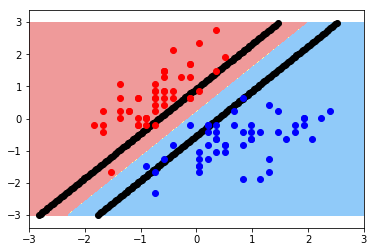

In [22]:
plot_svc_decision_boundry(svc5, [-3, 3, -3, 3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1], color='red')
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1], color='blue')
plt.show()